准确率: 0.7058823529411765
系数: [[ 2.19764725 11.08073351]]
截距: [-3.6921966]
LDA 投影值:
 [[ 2.48966223]
 [ 1.87805538]
 [ 0.63429272]
 [ 1.06894413]
 [ 0.06058418]
 [-0.01367306]
 [-0.6591105 ]
 [-0.18503661]
 [-0.8487354 ]
 [-0.02909373]
 [-1.8943278 ]
 [-1.34761302]
 [-0.27346689]
 [ 0.08756004]
 [ 1.09398593]
 [-1.41361935]
 [-0.64840822]]


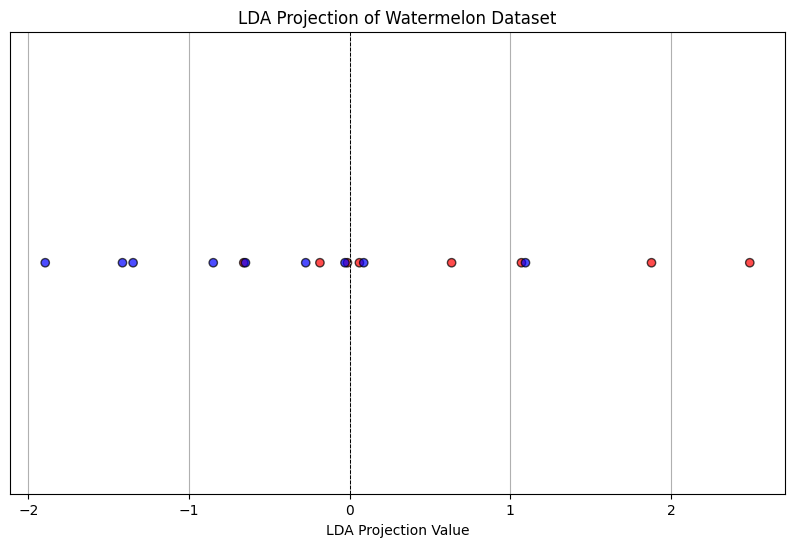

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder

# 创建西瓜数据集3.0α
data = {
    '密度': [0.697, 0.774, 0.634, 0.608, 0.556, 0.403, 0.481, 0.437, 0.666, 0.243,0.245, 0.343, 0.639, 0.657, 0.360, 0.593, 0.719],
    '含糖率': [0.460, 0.376, 0.264, 0.318, 0.215, 0.237, 0.149, 0.211, 0.091, 0.267, 0.057, 0.099, 0.161, 0.198, 0.370, 0.042, 0.103],
    '好瓜': ['是', '是', '是', '是', '是', '是', '是', '是', '否', '否','否', '否', '否', '否', '否', '否', '否']
}

# 转换为DataFrame
df = pd.DataFrame(data)

# 对标签进行编码
le = LabelEncoder()
df['好瓜'] = le.fit_transform(df['好瓜'])  # '是' -> 1, '否' -> 0

# 特征和标签
X = df[['密度', '含糖率']]
y = df['好瓜']

# 线性判别分析
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# 计算投影值
lda_projection = lda.transform(X)

# 打印结果
accuracy = (y == lda.predict(X)).mean()
print("准确率:", accuracy)
print("系数:", lda.coef_)
print("截距:", lda.intercept_)

# 打印投影值
print("LDA 投影值:\n", lda_projection)

# 可视化投影值
plt.figure(figsize=(10, 6))
colors = ['red' if label == 1 else 'blue' for label in y]
plt.scatter(lda_projection, np.zeros_like(lda_projection), c=colors, alpha=0.7, edgecolors='k')
plt.title('LDA Projection of Watermelon Dataset')
plt.xlabel('LDA Projection Value')
plt.yticks([])  # 不显示y轴
plt.grid(True)
plt.axvline(x=0, color='k', linestyle='--', lw=0.7)
plt.show()


支持向量:
[[2. 1.]
 [3. 2.]
 [1. 2.]
 [3. 3.]]
分类决策函数参数: w = [-0.6664  1.3328], b = -0.9994666666666664


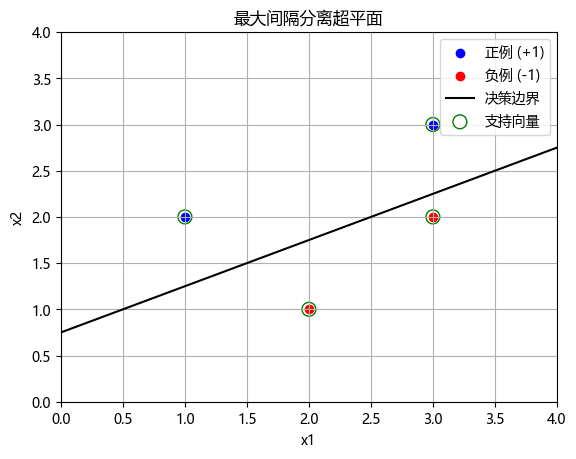

点 [2 2] 的分类结果: 1.0
点 [3 1] 的分类结果: -1.0
点 [1 1] 的分类结果: -1.0


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# 定义数据集
X = np.array([[1, 2],   # 正例 x1
              [3, 3],   # 正例 x2
              [2, 1],   # 负例 x3
              [3, 2]])  # 负例 x4
y = np.array([1, 1, -1, -1])  # 标签 +1 为正例，-1 为负例

# 训练支持向量机模型
model = svm.SVC(kernel='linear', C=1.0)
model.fit(X, y)

# 获取支持向量
support_vectors = model.support_vectors_
support_vector_indices = model.support_

# 打印支持向量
print("支持向量:")
print(support_vectors)

# 打印分类决策函数的参数
w = model.coef_[0]
b = model.intercept_[0]
print(f"分类决策函数参数: w = {w}, b = {b}")

# 绘制数据点
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='正例 (+1)')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='负例 (-1)')

# 绘制超平面
xx = np.linspace(0, 4, 50)
yy = -(w[0] * xx + b) / w[1]  # 计算决策边界的 y 值
plt.plot(xx, yy, color='black', label='决策边界')

# 绘制支持向量
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='green', label='支持向量')

# 设置图例和标题
plt.legend()
plt.title('最大间隔分离超平面')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.grid()
plt.axhline(0, color='grey', lw=0.5)  # 添加 y 轴
plt.axvline(0, color='grey', lw=0.5)  # 添加 x 轴
plt.show()

# 分类决策函数
def decision_function(x):
    return np.sign(np.dot(w, x) + b)

# 测试一些新点
test_points = np.array([[2, 2], [3, 1], [1, 1]])
for point in test_points:
    print(f"点 {point} 的分类结果: {decision_function(point)}")


In [7]:
import pandas as pd

# 创建西瓜数据集3.0
data = {
    '编号': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
             11, 12, 13, 14, 15, 16, 17],
    '色泽': ['青绿', '乌黑', '乌黑', '青绿', '浅白', 
             '青绿', '乌黑', '乌黑', '乌黑', '青绿', 
             '浅白', '浅白', '青绿', '浅白', '乌黑', 
             '浅白', '青绿'],
    '根蒂': ['蜷缩', '蜷缩', '蜷缩', '蜷缩', '蜷缩', 
             '稍蜷', '稍蜷', '稍蜷', '稍蜷', '硬挺', 
             '硬挺', '蜷缩', '稍蜷', '稍蜷', '稍蜷', 
             '蜷缩', '蜷缩'],
    '敲声': ['浊响', '沉闷', '浊响', '沉闷', '浊响', 
             '浊响', '浊响', '浊响', '沉闷', '清脆', 
             '清脆', '浊响', '浊响', '沉闷', '浊响', 
             '浊响', '沉闷'],
    '好瓜': ['是', '是', '是', '是', '是', 
             '是', '是', '是', '否', '否', 
             '否', '否', '否', '否', '否', 
             '否', '否']
}

# 创建 DataFrame
df = pd.DataFrame(data)

# 计算好瓜的先验概率
prob_good = len(df[df['好瓜'] == '是']) / len(df)
prob_bad = len(df[df['好瓜'] == '否']) / len(df)

# 计算条件概率
def calculate_conditional_probabilities(df, feature):
    # 计算各类的条件概率
    prob = {}
    for label in df['好瓜'].unique():
        subset = df[df['好瓜'] == label]
        prob[label] = subset[feature].value_counts(normalize=True).to_dict()
    return prob

# 计算前3个属性的条件概率
conditional_probs = {}
for feature in ['色泽', '根蒂', '敲声']:
    conditional_probs[feature] = calculate_conditional_probabilities(df, feature)

# 输出结果
print("先验概率:")
print(f"P(好瓜=是): {prob_good:.4f}")
print(f"P(好瓜=否): {prob_bad:.4f}\n")

print("条件概率:")
for feature, probs in conditional_probs.items():
    print(f"{feature}的条件概率:")
    for label, prob in probs.items():
        print(f"P({feature}|好瓜={label}): {prob}")
    print()


先验概率:
P(好瓜=是): 0.4706
P(好瓜=否): 0.5294

条件概率:
色泽的条件概率:
P(色泽|好瓜=是): {'乌黑': 0.5, '青绿': 0.375, '浅白': 0.125}
P(色泽|好瓜=否): {'浅白': 0.4444444444444444, '青绿': 0.3333333333333333, '乌黑': 0.2222222222222222}

根蒂的条件概率:
P(根蒂|好瓜=是): {'蜷缩': 0.625, '稍蜷': 0.375}
P(根蒂|好瓜=否): {'稍蜷': 0.4444444444444444, '蜷缩': 0.3333333333333333, '硬挺': 0.2222222222222222}

敲声的条件概率:
P(敲声|好瓜=是): {'浊响': 0.75, '沉闷': 0.25}
P(敲声|好瓜=否): {'浊响': 0.4444444444444444, '沉闷': 0.3333333333333333, '清脆': 0.2222222222222222}



预测结果: 是


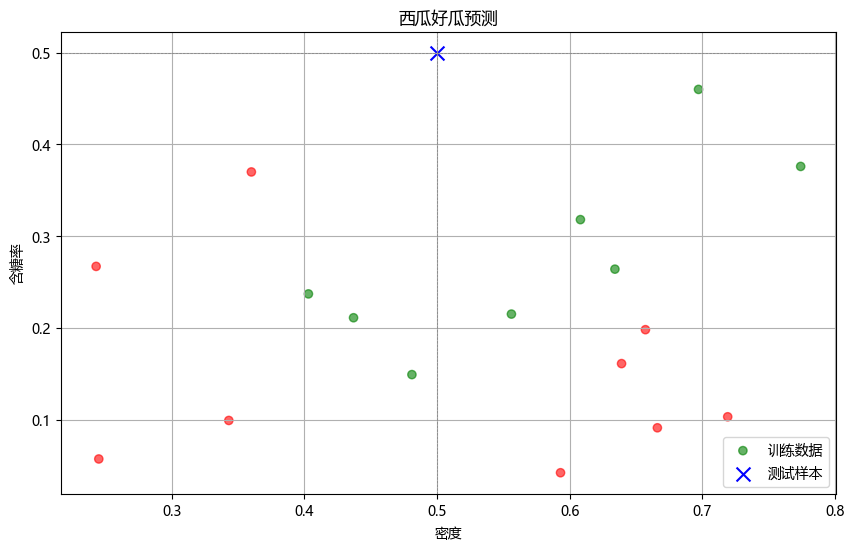

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
import matplotlib as mpl

#设置图表字体
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 或其他字体

# 1. 创建西瓜数据集3.0
data = {
    '色泽': ['青绿', '乌黑', '乌黑', '青绿', '浅白', '青绿', '乌黑', '乌黑', '乌黑', 
             '青绿', '浅白', '浅白', '青绿', '浅白', '乌黑', '浅白', '青绿'],
    '根蒂': ['蜷缩', '蜷缩', '蜷缩', '蜷缩', '蜷缩', '稍蜷', '稍蜷', '稍蜷', '稍蜷',
             '硬挺', '硬挺', '蜷缩', '稍蜷', '稍蜷', '稍蜷', '蜷缩', '蜷缩'],
    '敲声': ['浊响', '沉闷', '浊响', '沉闷', '浊响', '浊响', '浊响', '浊响', '沉闷',
             '清脆', '清脆', '浊响', '浊响', '沉闷', '浊响', '浊响', '沉闷'],
    '纹理': ['清晰', '清晰', '清晰', '清晰', '清晰', '清晰', '稍糊', '清晰', '稍糊',
             '清晰', '模糊', '模糊', '稍糊', '稍糊', '清晰', '模糊', '稍糊'],
    '脐部': ['凹陷', '凹陷', '凹陷', '凹陷', '凹陷', '稍凹', '稍凹', '稍凹', '稍凹',
             '平坦', '平坦', '平坦', '凹陷', '凹陷', '稍凹', '平坦', '稍凹'],
    '触感': ['硬滑', '硬滑', '硬滑', '硬滑', '硬滑', '软粘', '软粘', '硬滑', '硬滑',
             '软粘', '硬滑', '软粘', '硬滑', '硬滑', '软粘', '硬滑', '硬滑'],
    '密度': [0.697, 0.774, 0.634, 0.608, 0.556, 0.403, 0.481, 0.437, 0.666, 
             0.243, 0.245, 0.343, 0.639, 0.657, 0.360, 0.593, 0.719],
    '含糖率': [0.460, 0.376, 0.264, 0.318, 0.215, 0.237, 0.149, 0.211, 0.091,
             0.267, 0.057, 0.099, 0.161, 0.198, 0.370, 0.042, 0.103],
    '好瓜': ['是', '是', '是', '是', '是', '是', '是', '是', '否', 
             '否', '否', '否', '否', '否', '否', '否','否']
}

# 创建 DataFrame
df = pd.DataFrame(data)

# 2. 标签编码
label_encoders = {}
for column in ['色泽', '根蒂', '敲声', '纹理', '脐部', '触感']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# 3. 分离特征和标签
X = df.drop('好瓜', axis=1)
y = df['好瓜']

# 4. 训练朴素贝叶斯分类器
model = GaussianNB()
model.fit(X, y)

# 5. 准备测试数据并进行预测
test_data = pd.DataFrame({
    '色泽': [label_encoders['色泽'].transform(['浅白'])[0]],
    '根蒂': [label_encoders['根蒂'].transform(['蜷缩'])[0]],
    '敲声': [label_encoders['敲声'].transform(['沉闷'])[0]],
    '纹理': [label_encoders['纹理'].transform(['清晰'])[0]],
    '脐部': [label_encoders['脐部'].transform(['平坦'])[0]],
    '触感': [label_encoders['触感'].transform(['硬滑'])[0]],
    '密度': [0.5],
    '含糖率': [0.5]
})

# 6. 进行预测
prediction = model.predict(test_data)

# 7. 输出预测结果
prediction_result = prediction[0]
print("预测结果:", prediction_result)
# 8. 可视化训练数据及预测结果
plt.figure(figsize=(10, 6))

# 根据“密度”和“含糖率”绘制散点图
colors = {'是': 'g', '否': 'r'}
plt.scatter(df['密度'], df['含糖率'], c=df['好瓜'].map(colors), label='训练数据', alpha=0.6)

# 绘制测试数据点
plt.scatter(test_data['密度'], test_data['含糖率'], c='b', marker='x', s=100, label='测试样本')

plt.title('西瓜好瓜预测')
plt.xlabel('密度')
plt.ylabel('含糖率')
plt.legend()
plt.grid()
plt.axhline(0.5, color='gray', linestyle='--', linewidth=0.5)  # 添加参考线
plt.axvline(0.5, color='gray', linestyle='--', linewidth=0.5)  # 添加参考线
plt.show()



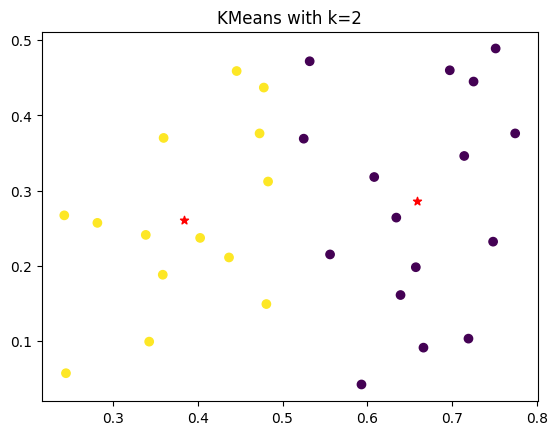

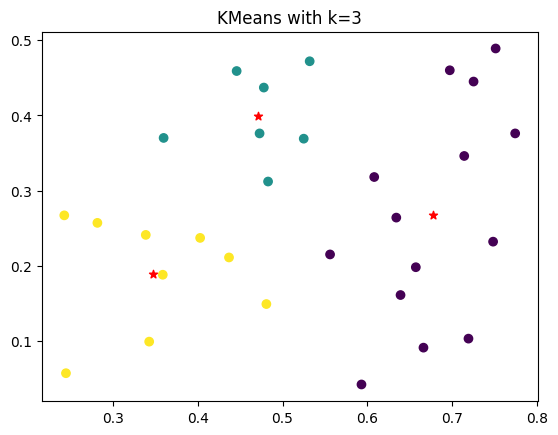

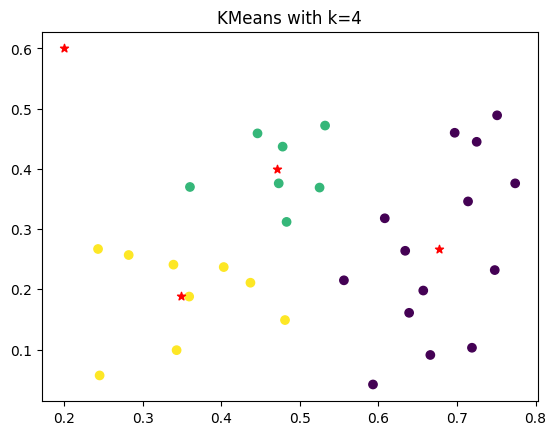

In [4]:
import numpy as np
import matplotlib.pyplot as plt


# 西瓜数据集4.0
data = np.array([
    [0.697, 0.460], [0.774, 0.376], [0.634, 0.264], [0.608, 0.318],
    [0.556, 0.215], [0.403, 0.237], [0.481, 0.149], [0.437, 0.211],
    [0.666, 0.091], [0.243, 0.267], [0.245, 0.057], [0.343, 0.099],
    [0.639, 0.161], [0.657, 0.198], [0.360, 0.370], [0.593, 0.042],
    [0.719, 0.103], [0.359, 0.188], [0.339, 0.241], [0.282, 0.257],
    [0.748, 0.232], [0.714, 0.346], [0.483, 0.312], [0.478, 0.437],
    [0.525, 0.369], [0.751, 0.489], [0.532, 0.472], [0.473, 0.376],
    [0.725, 0.445], [0.446, 0.459]
])

# k均值算法实现
def kmeans(data, k, initial_centers):
    centers = initial_centers
    clusters = np.zeros(data.shape[0], dtype=int)
    for _ in range(100):  # 迭代次数
        for i in range(data.shape[0]):
            min_dist = np.inf
            for j in range(k):
                dist = np.linalg.norm(data[i] - centers[j])
                if dist < min_dist:
                    min_dist = dist
                    clusters[i] = j
        for i in range(k):
            points_in_cluster = data[clusters == i]
            if points_in_cluster.size:
                centers[i] = np.mean(points_in_cluster, axis=0)
    return centers, clusters

# 设置不同的k值和初始中心点
k_values = [2, 3, 4]
initial_centers1 = np.array([[0.5, 0.3], [0.3, 0.5]])
initial_centers2 = np.array([[0.7, 0.4], [0.4, 0.7], [0.2, 0.2]])
initial_centers3 = np.array([[0.6, 0.2], [0.2, 0.6], [0.4, 0.4], [0.3, 0.3]])

# 进行实验比较
for k, centers in zip(k_values, [initial_centers1, initial_centers2, initial_centers3]):
    centers, clusters = kmeans(data, k, centers)
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='*')
    plt.title(f'KMeans with k={k}')
    plt.show()

# 讨论
# 初始中心点的选择对k均值算法的结果有很大影响。理想的初始中心点应该尽可能地分散在数据点的分布范围内，
# 这样可以更快地收敛到一个较好的解。如果初始中心点选择不当，可能会导致算法收敛到局部最优解。